In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


 p_c_i = 0.49648


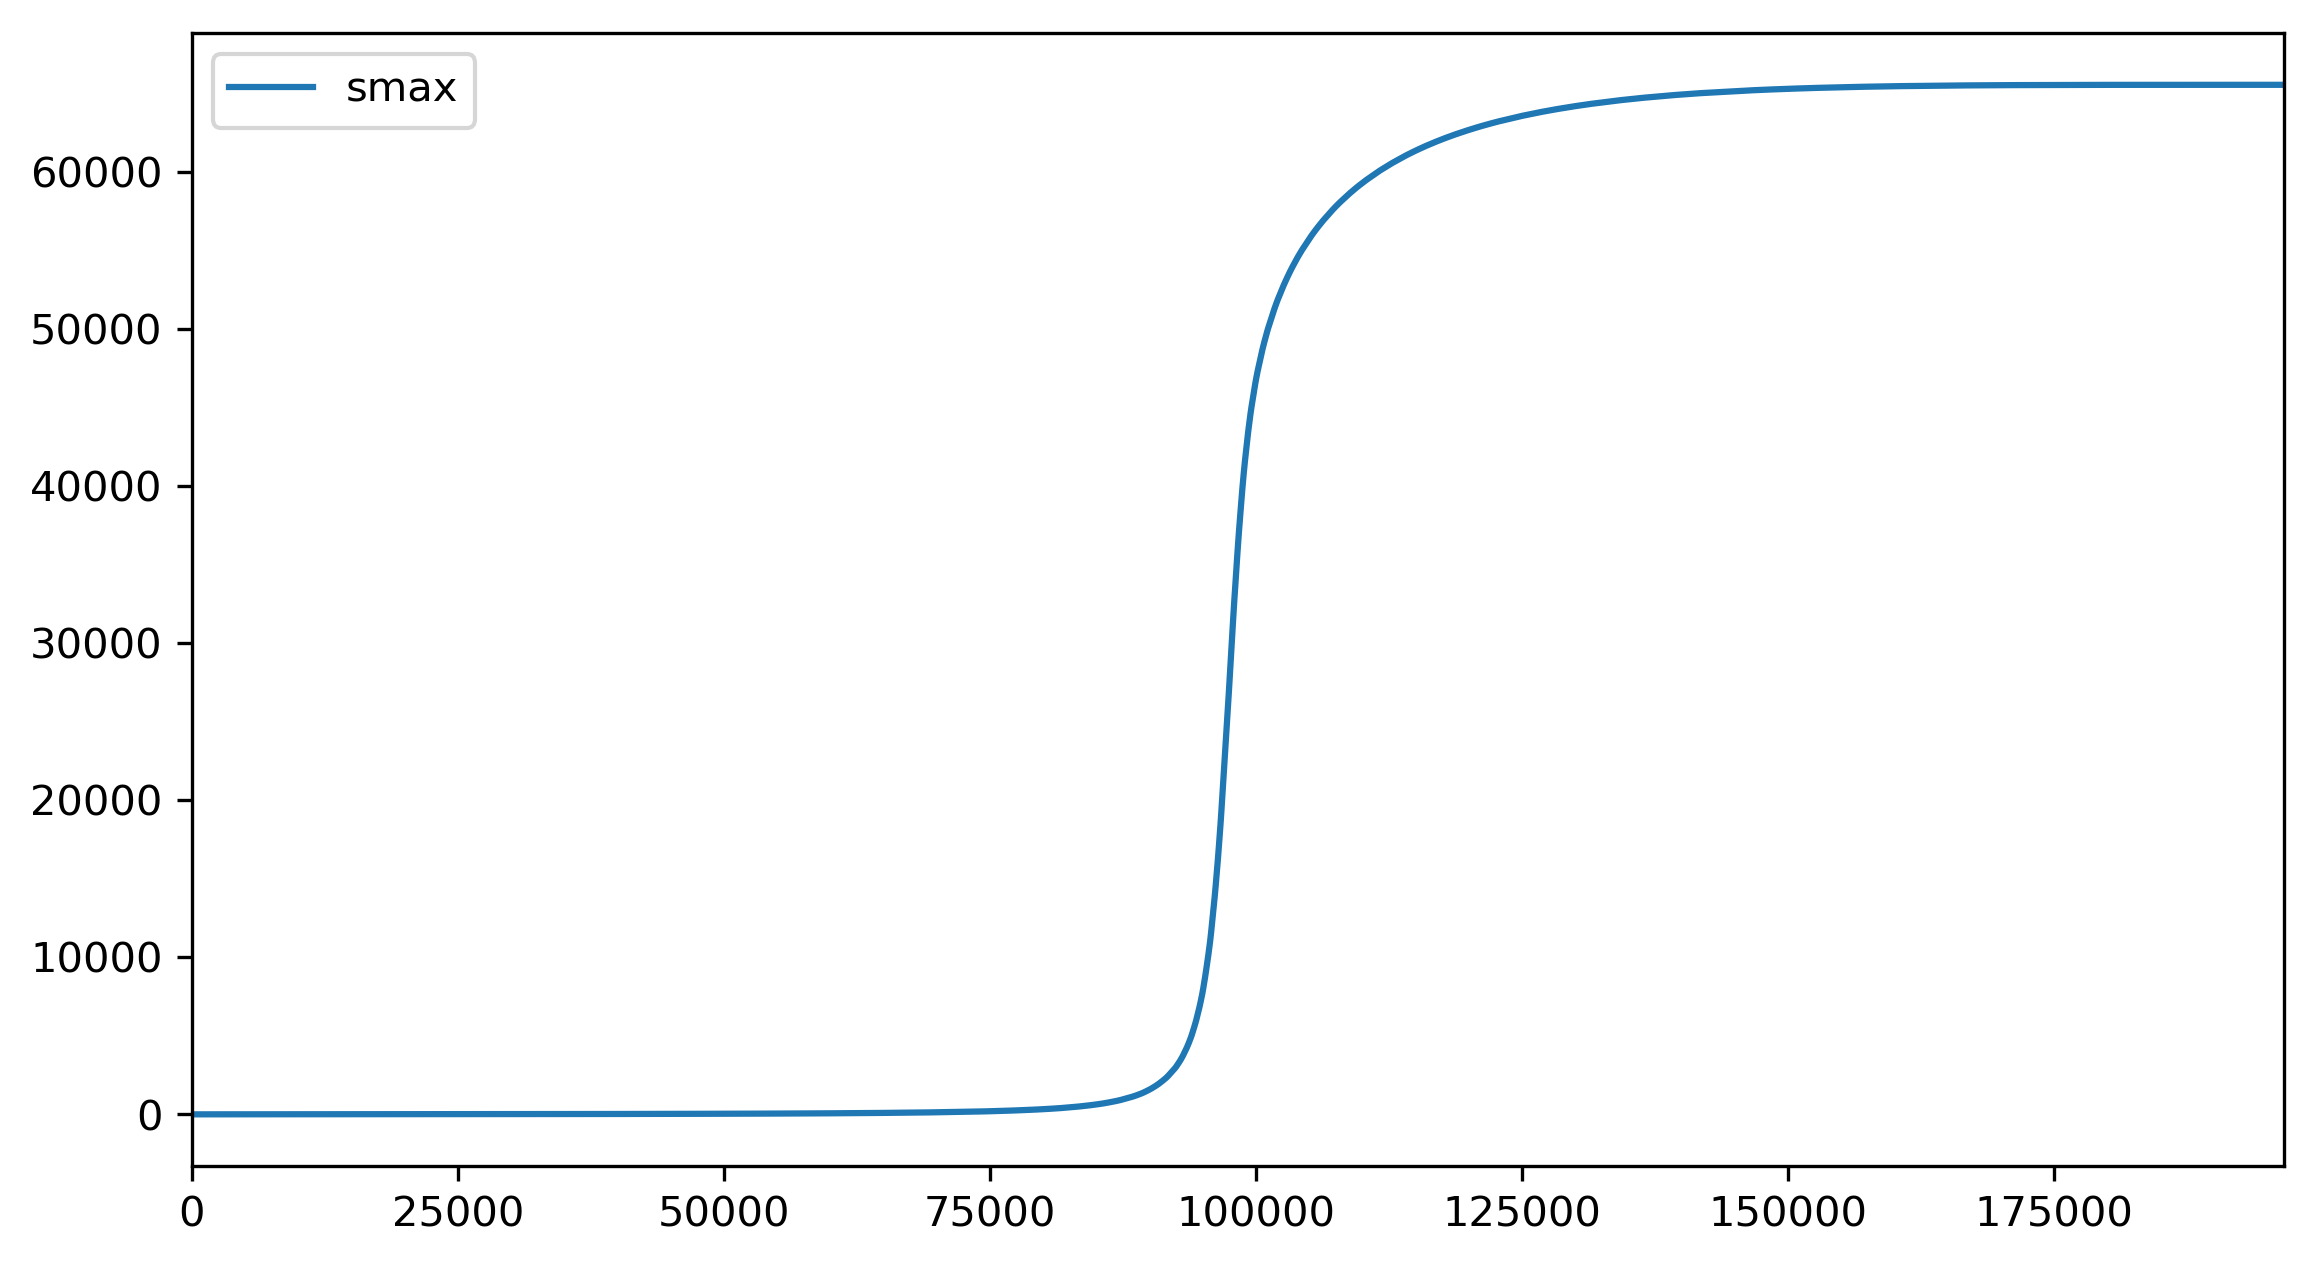

In [9]:
from helpers import display
mpl.rcParams['figure.dpi']= 300
script = "bond_mod.py"
#%run -i $script
outfile = "outfiles/"+script.strip('.py')
display(outfile)


 p_c_i = 0.49648


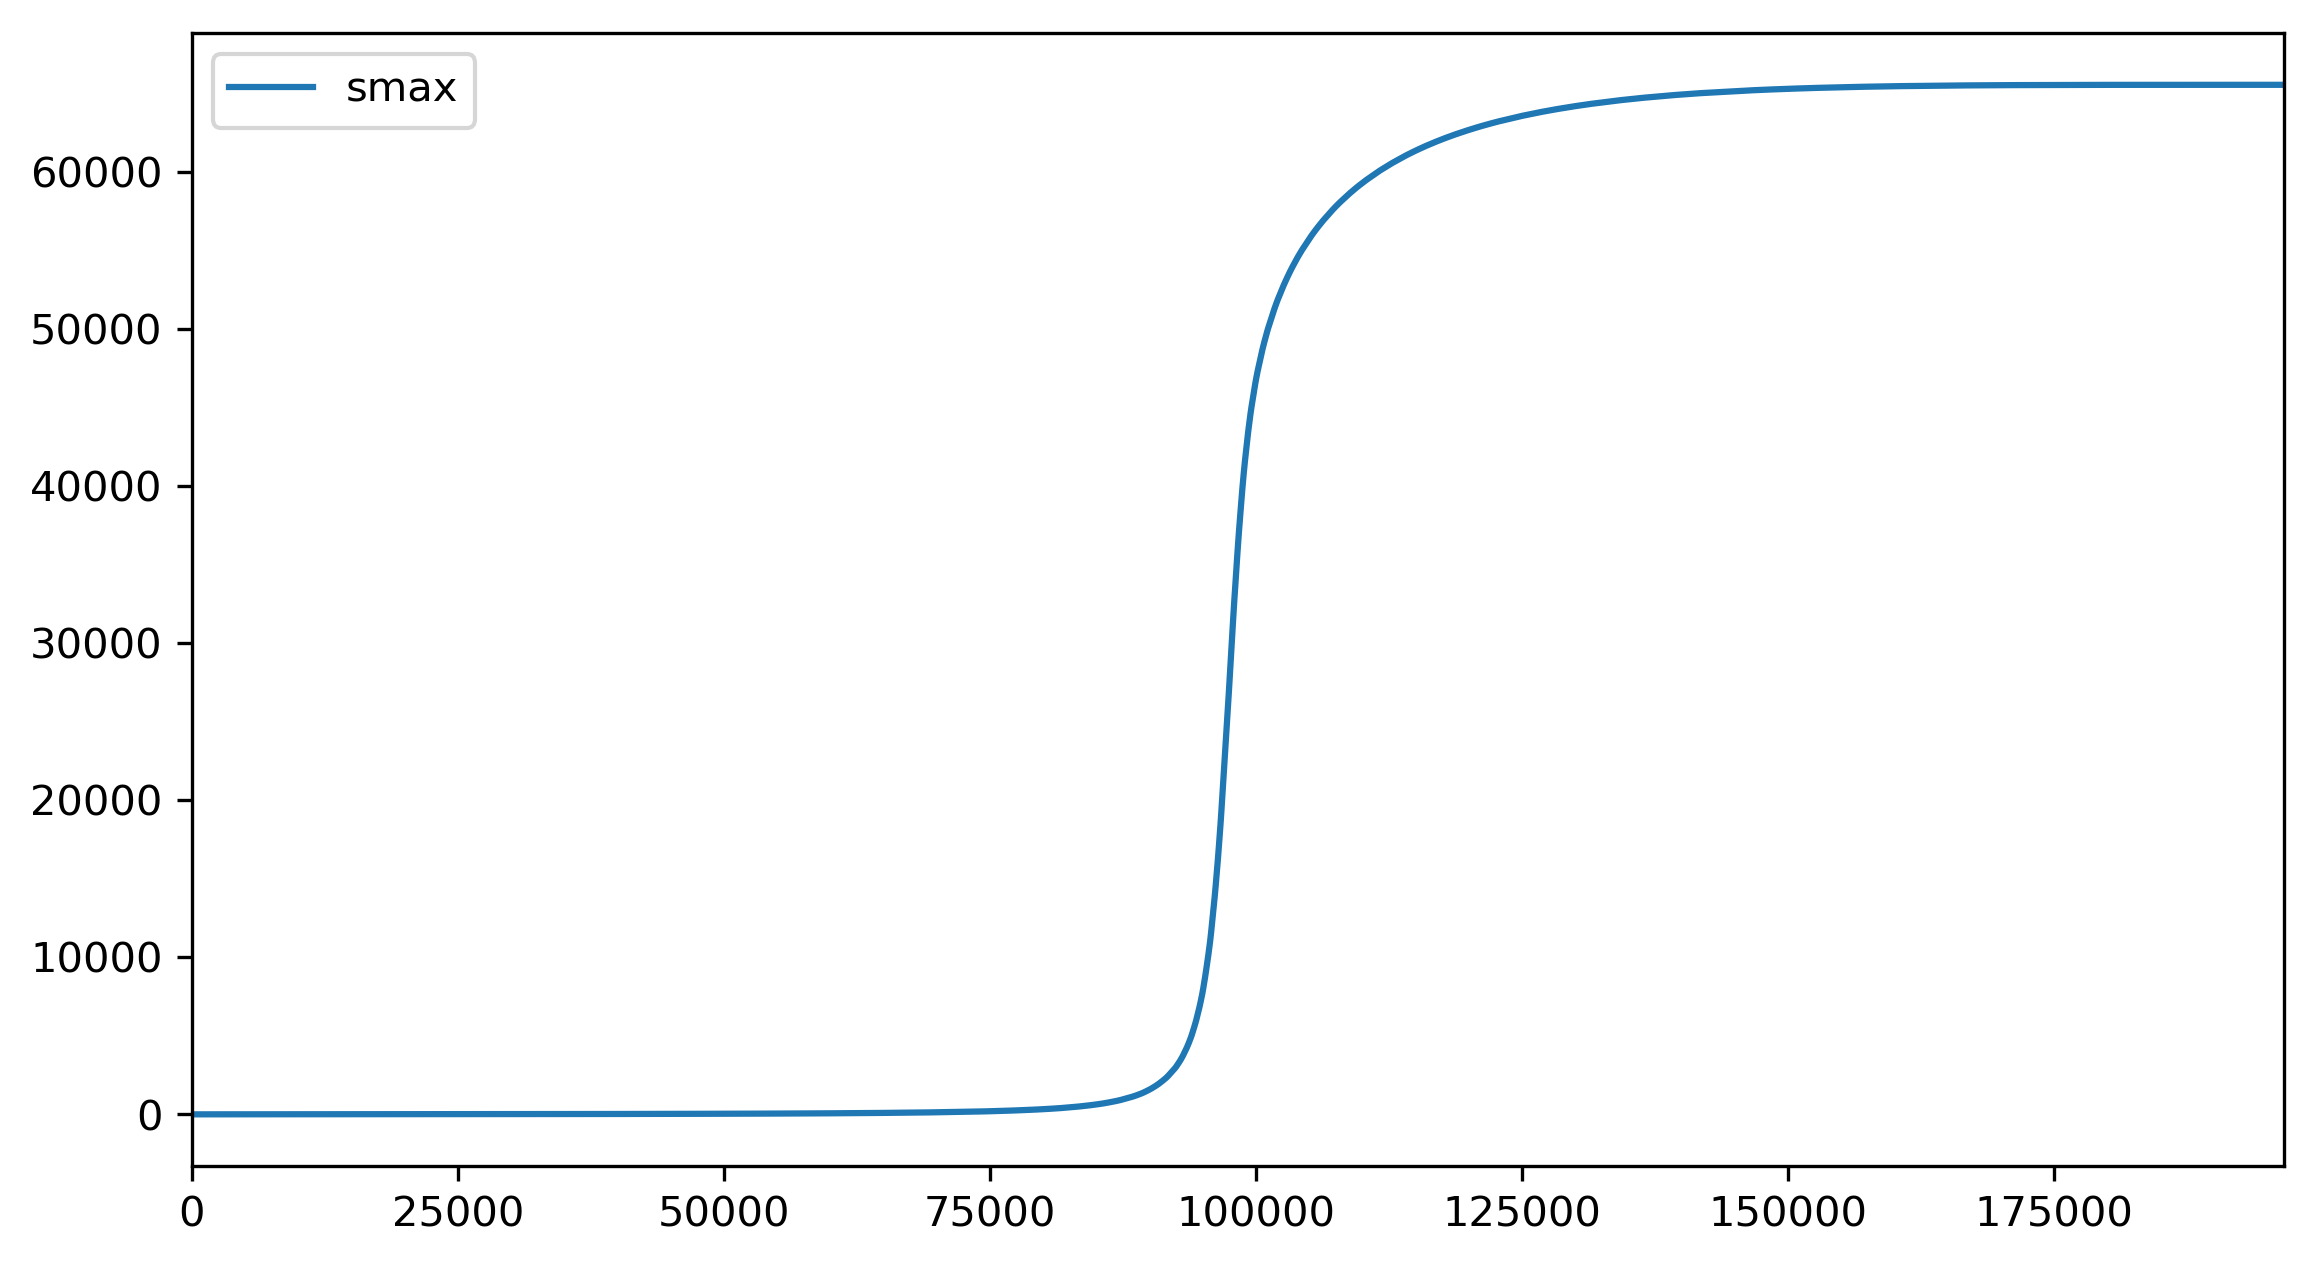

In [8]:
from helpers import display
mpl.rcParams['figure.dpi']= 300
script = "bond_mod.py"
#%run -i $script
outfile = "outfiles/"+script.strip('.py')
display(outfile)

In [6]:
def get_colors(vs, colors, ptr):
    b_g, g_r = colors
    c = []
    for i in vs:
        if ptr[i] < 0:
            c.append(str(b_g[len(b_g)+ptr[i]]))
        else:
            c.append(str(g_r[ptr[i]]))
    return c

In [7]:
from bond_jupy import *
import helpers as h
from colour import Color


WIDTH, HEIGHT = 64, 1
W, N = (WIDTH - 1), WIDTH*WIDTH*HEIGHT*3-WIDTH*WIDTH

red, blue, green = Color("red"), Color("blue"), Color("green")
colors = [list(blue.range_to(green, WIDTH**2)), list(green.range_to(red, WIDTH**2))]

# initialize bonds
v1, v2, es = [0]*(3*N), [0]*(3*N), []
index = init_lists(v1, v2, WIDTH, HEIGHT, W)            

#shuffle bonds
shuffle_bonds(index, v1, v2)   

# init M2, ptr lists and biggest cluster
M2, ptr, big, M2minus = N, [-1]*N, 0, [0]*index         
lists = [v1, v2, ptr, M2minus]

g, style = h.init_g(WIDTH, HEIGHT)
g.vs["name"] = [i for i in range(0, index)]
for i in range(0, index):
    source, target = cluster(i, lists, big, M2)
    if h.valid_pair(source, target, WIDTH):
        col_s, col_t = get_colors([source, target], colors, ptr)
        g.add_edge(source, target)
        g.vs[source]["color"] = col_s
        g.vs[target]["color"] = col_t
    h.plot(g, style, i)


0.5007889518708536


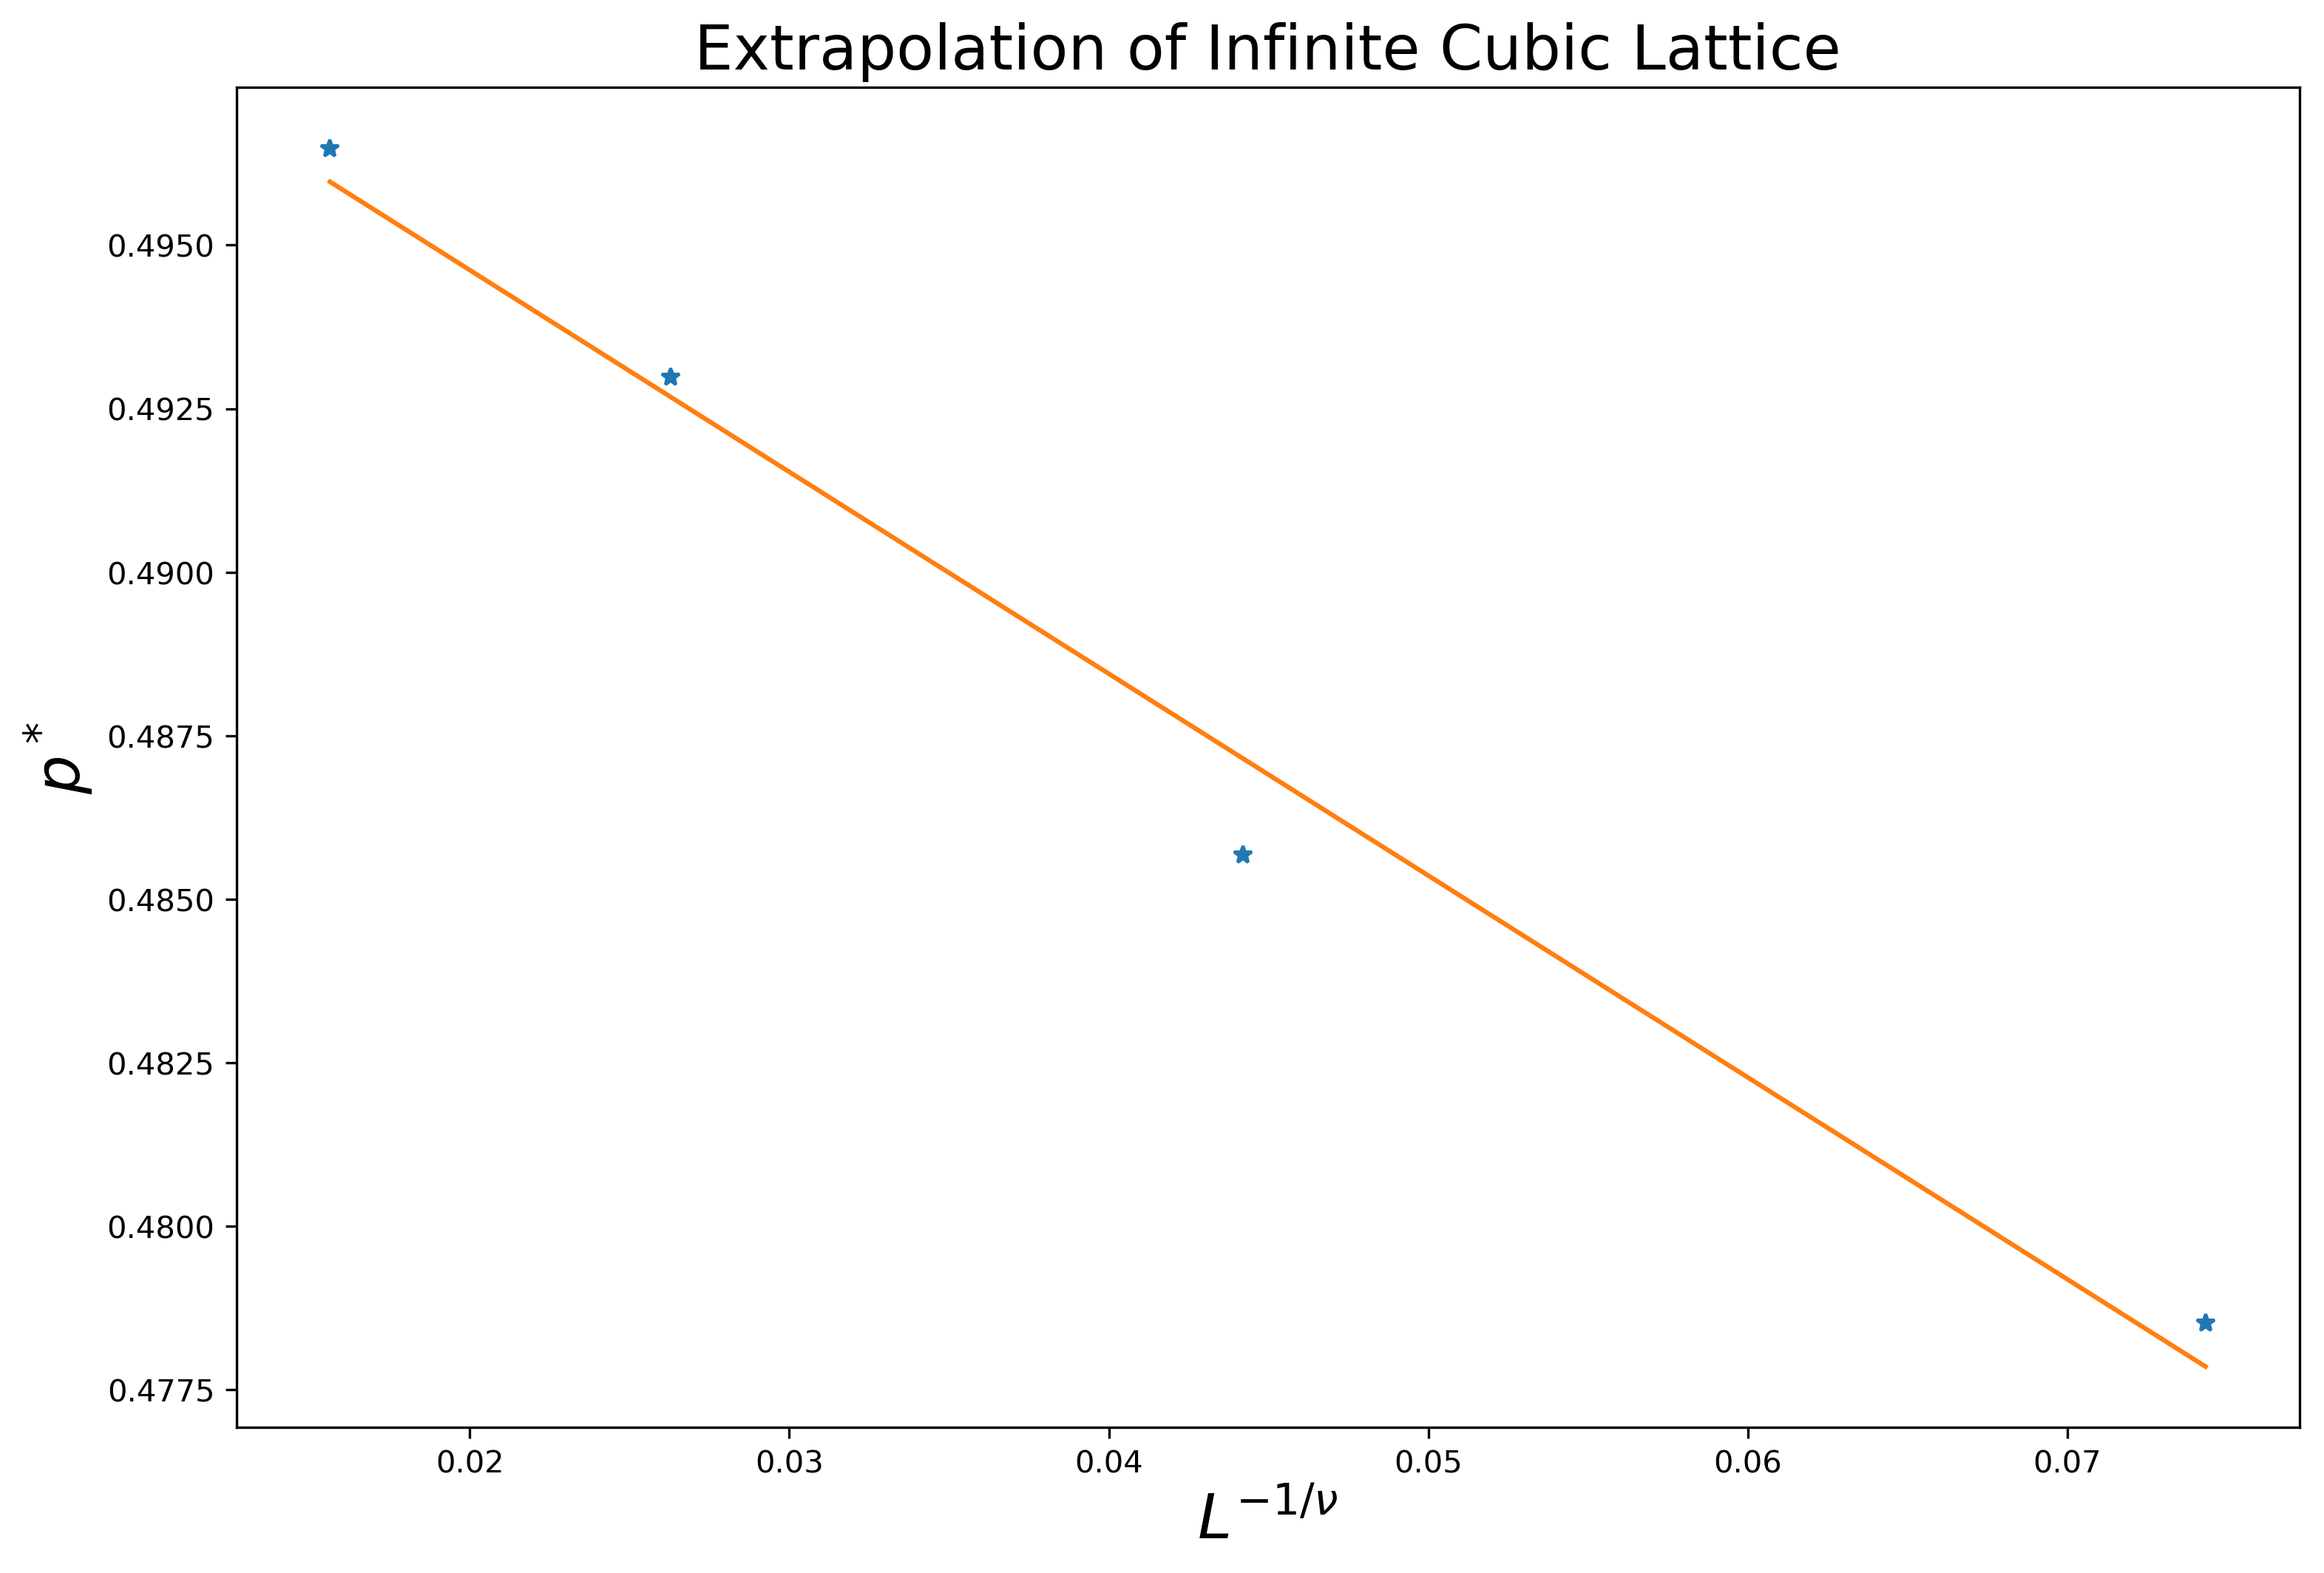

In [12]:
p_c = {}
p_c["32"] = 0.47852
p_c["64"] = 0.48568
p_c["128"] = 0.49298
p_c["256"] = 0.49648

nu = 4/3
L_nu = [int(i)**(-1/nu) for i in p_c]
p_obs = [p_c[i] for i in p_c]
c, res, e, e, e = np.polyfit(L_nu, p_obs, 1, full=True)
slope, intercept = c
plt.title('Extrapolation of Infinite Cubic Lattice', fontsize = 20)
plt.xlabel('$L^{-1/\\nu}$', fontsize=20)
plt.ylabel('$p^*$', fontsize=20)
plt.gcf().set_size_inches(12, 8)
plt.plot(L_nu, p_obs, '*')
fit = [slope*i+intercept for i in L_nu]
plt.plot(L_nu, fit)
print(intercept)